Fork Repository

In [6]:
!git clone https://github.com/PremSavariya/DenoiSeg

Cloning into 'DenoiSeg'...
remote: Enumerating objects: 809, done.
remote: Counting objects: 100% (309/309), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 809 (delta 184), reused 276 (delta 179), pack-reused 500
Receiving objects: 100% (809/809), 44.62 MiB | 40.90 MiB/s, done.
Resolving deltas: 100% (451/451), done.


In [7]:
%cd DenoiSeg

/content/DenoiSeg


Dropout


In [8]:
# from IPython.display import FileLink

# # Create a link to download the file
# FileLink(r'C:\Users\prems\OneDrive\Desktop\Raml\DenoiSeg\denoiseg\models\denoiseg_standard.py')

In [9]:
# import shutil

# # Path to your modified file
# source_path = r"C:\Users\prems\OneDrive\Desktop\denoiseg_standard.py"
# destination_path = r"C:\Users\prems\OneDrive\Desktop\Raml\DenoiSeg\denoiseg\models\denoiseg_standard.py"

# # Replace the original file with the modified file
# shutil.move(source_path, destination_path)

In [10]:
# !git add denoiseg/models/denoiseg_standard.py

In [11]:
# !git commit -m "Previous"

In [12]:
# !git push origin main

Threshold

In [13]:
# from IPython.display import FileLink

# # Create a link to download the file
# FileLink(r'C:\Users\prems\OneDrive\Desktop\Raml\DenoiSeg\denoiseg\utils\compute_precision_threshold.py')


In [14]:
# import shutil

# # Path to your modified file
# source_path = r"C:\Users\prems\OneDrive\Desktop\Raml\compute_precision_threshold.py"
# destination_path = r'C:\Users\prems\OneDrive\Desktop\Raml\DenoiSeg\denoiseg\utils\compute_precision_threshold.py'

# # Replace the original file with the modified file
# shutil.move(source_path, destination_path)

In [15]:
# !git add denoiseg/utils/compute_precision_threshold.py

In [16]:
# !git commit -m "Fixed dtype issue in pixel_sharing_bipartite functions"

In [17]:
# !git push origin main

In [18]:
# ! pip install -e .

In [22]:
!pip install denoiseg
!pip install imgaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 825.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.5/39.5 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.8 MB/s eta 0:00:00


In [24]:

import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

from denoiseg.models import DenoiSeg, DenoiSegConfig
from denoiseg.utils.misc_utils import combine_train_test_data, shuffle_train_data, augment_data
from denoiseg.utils.seg_utils import *
from denoiseg.utils.compute_precision_threshold import measure_precision
from denoiseg.utils.denoiseg_data_preprocessing import generate_patches_from_list

from imgaug import augmenters as iaa
import matplotlib.image as mp
import cv2

from csbdeep.utils import plot_history

import urllib
import os
import zipfile

In [27]:
noise_level = 'n10'

In [28]:
# create a folder for our data
if not os.path.isdir('./data'):
    os.mkdir('data')

if noise_level == 'n0':
    link = 'https://zenodo.org/record/5156969/files/DSB2018_n0.zip?download=1'
elif noise_level == 'n10':
    link = 'https://zenodo.org/record/5156977/files/DSB2018_n10.zip?download=1'
elif noise_level == 'n20':
    link = 'https://zenodo.org/record/5156983/files/DSB2018_n20.zip?download=1'
else:
    print('This noise level does not exist for this dataset.')

# check if data has been downloaded already
zipPath="data/DSB2018_{}.zip".format(noise_level)
if not os.path.exists(zipPath):
    #download and unzip data
    data = urllib.request.urlretrieve(link, zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("data")

In [29]:
# Loading of the training images
trainval_data =  np.load('data/DSB2018_{}/train/train_data.npz'.format(noise_level))
train_images = trainval_data['X_train'].astype(np.float32)
train_masks = trainval_data['Y_train']
val_images = trainval_data['X_val'].astype(np.float32)
val_masks = trainval_data['Y_val']

In [30]:
print("Shape of train_images: {}".format(train_images.shape))
print("Shape of train_masks:  {}".format(train_masks.shape))
print("Shape of val_images:   {}".format(val_images.shape))
print("Shape of val_masks:    {}".format(val_masks.shape))

Shape of train_images: (3800, 128, 128)
Shape of train_masks:  (3800, 128, 128)
Shape of val_images:   (670, 128, 128)
Shape of val_masks:    (670, 128, 128)


In [31]:
def zoom(train_images, train_masks):
    zoom = iaa.Affine(scale=(1, 1.3))
    train_images = zoom.augment_image(train_images)
    train_masks = zoom.augment_image(train_masks)
    return train_images, train_masks

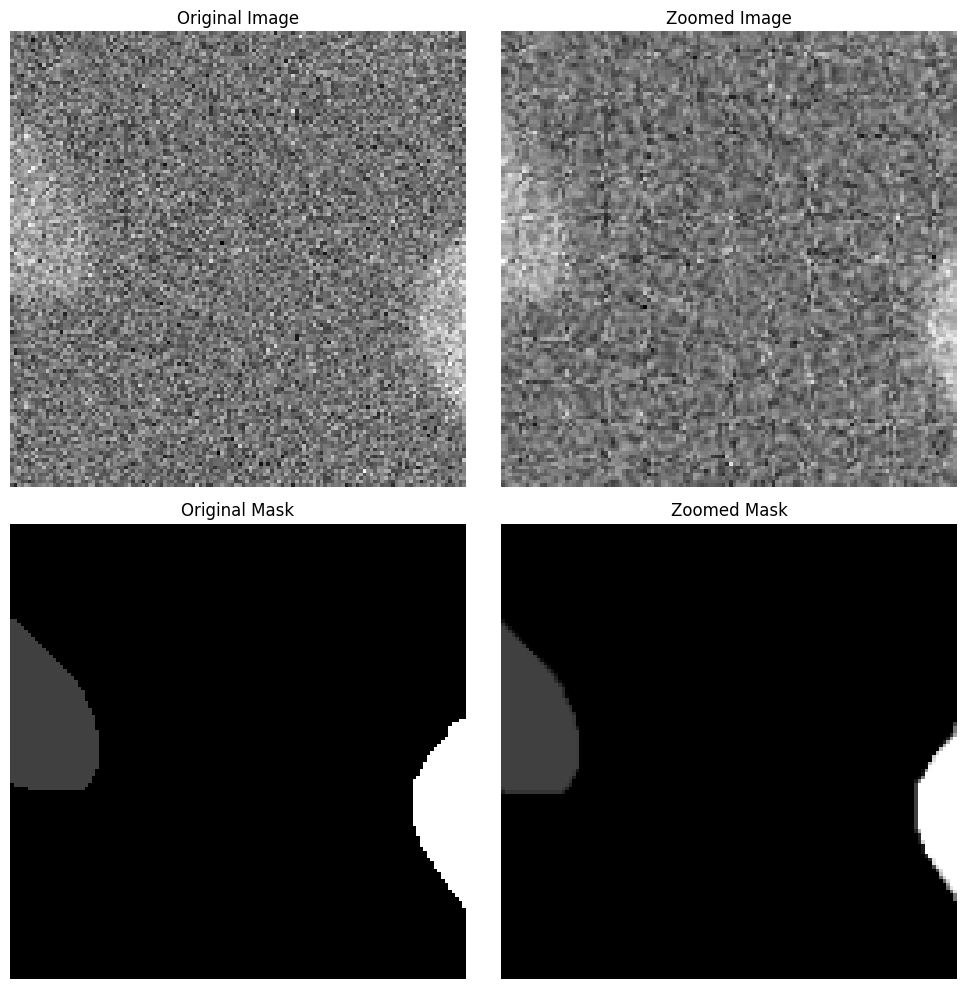

In [32]:
def display_images(original_image, zoomed_image, original_mask, zoomed_mask):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    axes[0, 0].imshow(original_image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(zoomed_image, cmap='gray')
    axes[0, 1].set_title('Zoomed Image')
    axes[0, 1].axis('off')

    axes[1, 0].imshow(original_mask, cmap='gray')
    axes[1, 0].set_title('Original Mask')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(zoomed_mask, cmap='gray')
    axes[1, 1].set_title('Zoomed Mask')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage with the first image and mask in the dataset
original_image = train_images[0]
original_mask = train_masks[0]
zoomed_image, zoomed_mask = zoom(original_image, original_mask)

# Display the images
display_images(original_image, zoomed_image, original_mask, zoomed_mask)

In [33]:
def pan(train_images, train_masks):
    pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
    train_images = pan.augment_image(train_images)
    train_masks = pan.augment_image(train_masks)
    return train_images, train_masks

In [34]:
def img_random_brightness(train_images, train_masks):
    brightness = iaa.Multiply((0.2, 1.2))
    train_images = brightness.augment_image(train_images)
    train_masks = brightness.augment_image(train_masks)
    return train_images, train_masks

In [35]:
def img_random_flip(train_images, train_masks):
    train_images = cv2.flip(train_images, 1)
    train_masks = cv2.flip(train_masks, 1)
    return train_images, train_masks

In [36]:
def auto_contrast(train_images, train_masks):
    # Convert images to uint8
    train_images_uint8 = np.clip(train_images * 255, 0, 255).astype(np.uint8)
    train_masks_uint8 = np.clip(train_masks * 255, 0, 255).astype(np.uint8)

    aug = iaa.pillike.Autocontrast((10, 20), per_channel=True)
    train_images_uint8 = aug.augment_image(train_images_uint8)
    train_masks_uint8 = aug.augment_image(train_masks_uint8)

    # Convert images back to float32
    train_images = train_images_uint8.astype(np.float32) / 255.0
    # Convert images back to float32
    train_masks = train_masks_uint8.astype(np.float32) / 255.0

    return train_images, train_masks

In [37]:
def enhance_color(train_images, train_masks):
    # Convert images to uint8
    train_images_uint8 = np.clip(train_images * 255, 0, 255).astype(np.uint8)
    train_masks_uint8 = np.clip(train_masks * 255, 0, 255).astype(np.uint8)

    color = iaa.pillike.EnhanceColor()
    train_images_uint8 = color.augment_image(train_images_uint8)
    train_masks_uint8 = color.augment_image(train_masks_uint8)

    # Convert images back to float32
    train_images = train_images_uint8.astype(np.float32) / 255.0
    # Convert images back to float32
    train_masks = train_masks_uint8.astype(np.float32) / 255.0

    return train_images, train_masks

In [38]:
def horizontal_flip(train_images, train_masks):
    hori = iaa.Fliplr(0.5)
    train_images = hori.augment_image(train_images)
    train_masks = hori.augment_image(train_masks)
    return train_images, train_masks

In [39]:
def vertical_flip(train_images, train_masks):
    ver = iaa.Flipud(0.5)
    train_images = ver.augment_image(train_images)
    train_masks = ver.augment_image(train_masks)
    return train_images, train_masks

In [40]:
def rotate(train_images, train_masks):
    rot = iaa.Affine(rotate=(-45, 45))
    train_images = rot.augment_image(train_images)
    train_masks = rot.augment_image(train_masks)
    return train_images, train_masks

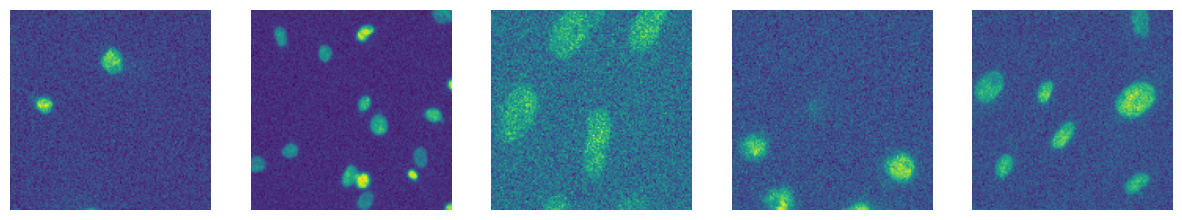

In [41]:
import random #Purpose: Displays a random set of images from the dataset.

# Choose a random key (assuming each key corresponds to an array of images)
random_key = random.choice(trainval_data.files)
images = trainval_data[random_key]

# Number of images to display
num_images_to_display = 5

# Display random images from the chosen array
fig, axs = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for ax in axs:
    random_index = random.randint(0, len(images) - 1)
    random_image = images[random_index]
    ax.imshow(random_image)
    ax.axis('off')  # Hide axis

plt.show()

Train images

Display random training images and masks from the dataset.


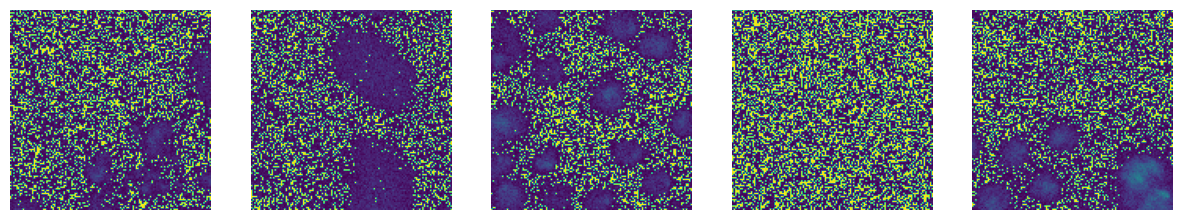

In [42]:
# Number of images to display
num_images_to_display = 5

# Display random images from the train_images array
fig, axs = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for ax in axs:
    random_index = random.randint(0, len(train_images) - 1)
    random_image = train_images[random_index]
    ax.imshow(random_image.astype(np.uint8))
    ax.axis('off')  # Hide axis

plt.show()

Train masks

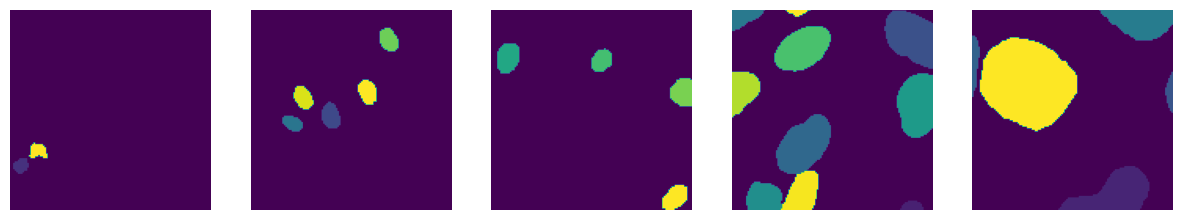

In [43]:
# Number of images to display
num_images_to_display = 5

# Display random images from the train_images array
fig, axs = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for ax in axs:
    random_index = random.randint(0, len(train_masks) - 1)
    random_image = train_masks[random_index]
    ax.imshow(random_image.astype(np.uint8))
    ax.axis('off')

plt.show()

Manages the usage of annotated images for training, ensuring only a specified fraction is used.

In [44]:
# Set the number of annotated training images.
# Values: 0.0 (no annotated images) to total number of training images (all images have annotations)
number_of_annotated_training_images = 19
assert number_of_annotated_training_images >= 0.0 and number_of_annotated_training_images <=train_images.shape[0]

In [45]:
# Seed to shuffle training data (annotated GT and raw image pairs).
seed = 1

# First we shuffle the training images to remove any bias.
X_shuffled, Y_shuffled = shuffle_train_data(train_images, train_masks, random_seed=seed)

# Here we convert the number of annotated images to be used for training as percentage of available training data.
percentage_of_annotated_training_images = float((number_of_annotated_training_images/train_images.shape[0]) * 100.0)
assert percentage_of_annotated_training_images >= 0.0 and percentage_of_annotated_training_images <= 100.0

# Here we zero out all training images which are not part of the
# selected percentage.
X_frac, Y_frac = zero_out_train_data(train_images, train_masks, fraction=percentage_of_annotated_training_images)

# Here we generate patches from images and apply augmentation
X_final, Y_final = generate_patches_from_list([X_frac], [Y_frac], "SYXC", augment=True, shuffle=False, shape=(128, 128))
X_val_final, Y_val_final = generate_patches_from_list([val_images], [val_masks], "SYXC", augment=False, shape=(128, 128))

X_final = X_final[... ,np.newaxis]
Y_final = convert_to_oneHot(Y_final, n_classes=3)

X_val_final = X_val_final[... ,np.newaxis]
Y_val_final = convert_to_oneHot(Y_val_final, n_classes=3)

print("Shape of X:     {}".format(X_final.shape))
print("Shape of Y:     {}".format(Y_final.shape))
print("Shape of X_val: {}".format(X_val_final.shape))
print("Shape of Y_val: {}".format(Y_val_final.shape))

Shape of X:     (30400, 128, 128, 1)
Shape of Y:     (30400, 128, 128, 3)
Shape of X_val: (670, 128, 128, 1)
Shape of Y_val: (670, 128, 128, 3)


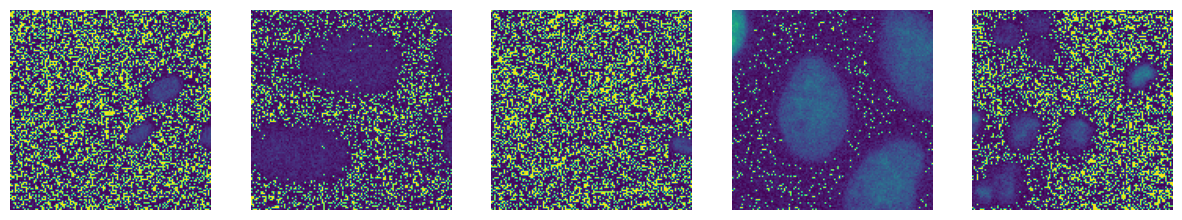

In [46]:
# Number of images to display
num_images_to_display = 5

# Display random images from the train_images array
fig, axs = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for ax in axs:
    random_index = random.randint(0, len(X_final) - 1)
    random_image = X_final[random_index]
    ax.imshow(random_image.astype(np.uint8))
    ax.axis('off')

plt.show()

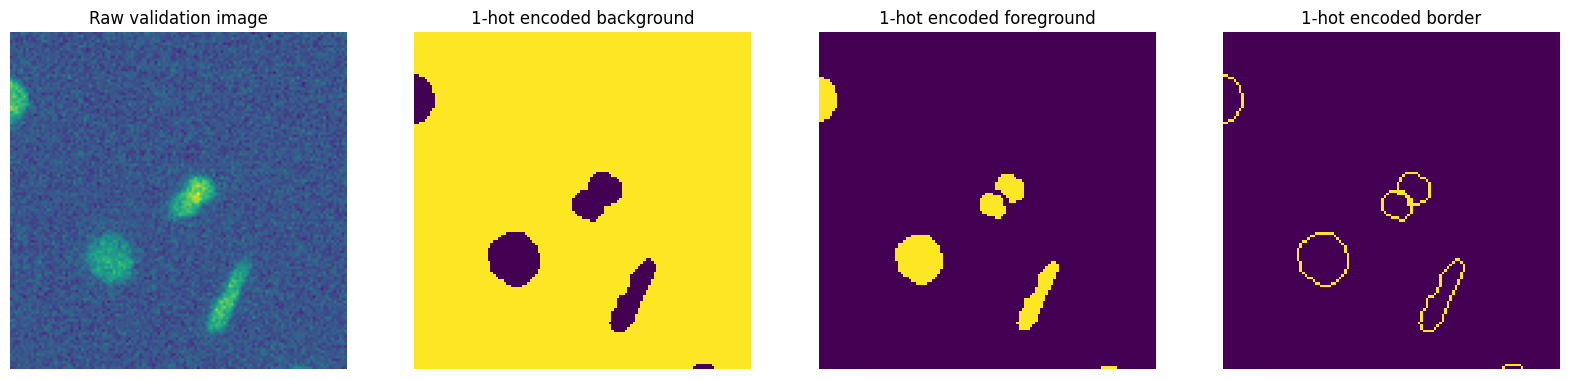

In [47]:
sample = 10
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(X_final[sample,...,0])
plt.axis('off')
plt.title('Raw validation image')
plt.subplot(1,4,2)
plt.imshow(Y_final[sample,...,0], vmin=0, vmax=1, interpolation='nearest')
plt.axis('off')
plt.title('1-hot encoded background')
plt.subplot(1,4,3)
plt.imshow(Y_final[sample,...,1], vmin=0, vmax=1, interpolation='nearest')
plt.axis('off')
plt.title('1-hot encoded foreground')
plt.subplot(1,4,4)
plt.imshow(Y_final[sample,...,2], vmin=0, vmax=1, interpolation='nearest')
plt.axis('off')
plt.title('1-hot encoded border');

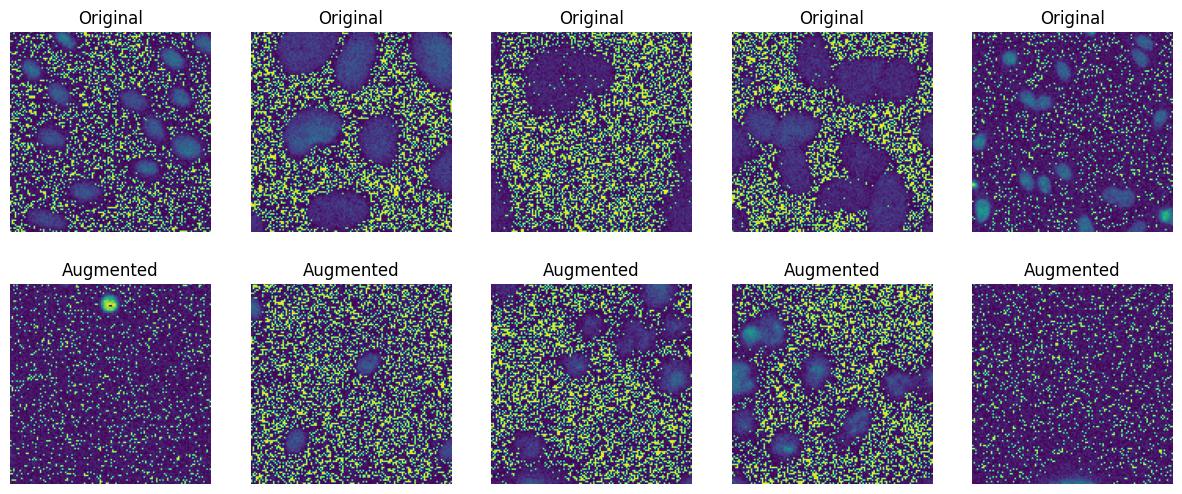

In [48]:
# Number of images to display
num_images_to_display = 5

# Select random indices for display
random_indices = random.sample(range(train_images.shape[0]), num_images_to_display)

fig, axs = plt.subplots(2, num_images_to_display, figsize=(15, 6))

for i, idx in enumerate(random_indices):
    # Original images
    axs[0, i].imshow(train_images[idx].astype(np.uint8))
    axs[0, i].axis('off')
    axs[0, i].set_title('Original')

    # Augmented images
    axs[1, i].imshow(X_final[idx].squeeze().astype(np.uint8))  # Use squeeze to remove any singleton dimensions
    axs[1, i].axis('off')
    axs[1, i].set_title('Augmented')

plt.show()

In [49]:
train_batch_size = 32  # Trying a smaller batch size for potentially better generalization
train_steps_per_epoch = min(400, max(int(X_final.shape[0]/train_batch_size), 10))

conf = DenoiSegConfig(X_final,
                      unet_kern_size=3,  # Trying a larger kernel size
                      n_channel_in=1,
                      n_channel_out=4,
                      relative_weights = [1.0, 1.0, 3.0],  # Adjust if needed
                      train_steps_per_epoch=train_steps_per_epoch,
                      train_epochs=50,  # Increased epochs for more learning time
                      batch_norm=True,
                      train_batch_size=train_batch_size,
                      unet_n_first = 32,  # Increased number of filters
                      unet_n_depth=4,  # Increased depth
                      denoiseg_alpha=0.5,
                      train_tensorboard=True)

vars(conf)


{'means': ['13.494062'],
 'stds': ['20.886501'],
 'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 1,
 'n_channel_out': 4,
 'train_loss': 'denoiseg',
 'unet_n_depth': 4,
 'relative_weights': [1.0, 1.0, 3.0],
 'unet_kern_size': 3,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'probabilistic': False,
 'unet_residual': False,
 'unet_input_shape': (None, None, 1),
 'train_epochs': 50,
 'train_steps_per_epoch': 400,
 'train_learning_rate': 0.0004,
 'train_batch_size': 32,
 'train_tensorboard': True,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'train_reduce_lr': {'monitor': 'val_loss', 'factor': 0.5, 'patience': 10},
 'batch_norm': True,
 'n2v_perc_pix': 1.5,
 'n2v_patch_shape': (64, 64),
 'n2v_manipulator': 'uniform_withCP',
 'n2v_neighborhood_radius': 5,
 'denoiseg_alpha': 0.5}

In [50]:
model_name = 'DenoiSeg_DSB18_n10'
basedir = 'models'
model = DenoiSeg(conf, model_name, basedir) #Creates a DenoiSeg model with the specified configuration, name, and base directory.

In [51]:
history = model.train(X_final, Y_final, (X_val_final, Y_val_final))

/content/DenoiSeg/denoiseg/models/denoiseg_standard.py:157: UserWarning: small number of validation images (only 2.15642% of all images)
  warnings.warn("small number of validation images (only %.05f%% of all images)" % (100 * frac_val))


61 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|██████████| 670/670 [00:04<00:00, 139.80it/s]


Epoch 1/50
400/400 [==============================] - 166s 399ms/step - loss: 0.1589 - denoiseg: 0.1589 - seg_loss: 0.0034 - denoise_loss: 0.1555 - val_loss: 0.6066 - val_denoiseg: 0.6066 - val_seg_loss: 0.4811 - val_denoise_loss: 0.1255 - lr: 4.0000e-04
Epoch 2/50
400/400 [==============================] - 155s 388ms/step - loss: 0.1374 - denoiseg: 0.1374 - seg_loss: 0.0019 - denoise_loss: 0.1354 - val_loss: 0.6118 - val_denoiseg: 0.6120 - val_seg_loss: 0.4629 - val_denoise_loss: 0.1490 - lr: 4.0000e-04
Epoch 3/50
400/400 [==============================] - 156s 391ms/step - loss: 0.1330 - denoiseg: 0.1330 - seg_loss: 0.0018 - denoise_loss: 0.1312 - val_loss: 0.4036 - val_denoiseg: 0.4036 - val_seg_loss: 0.2811 - val_denoise_loss: 0.1225 - lr: 4.0000e-04
Epoch 4/50
400/400 [==============================] - 155s 388ms/step - loss: 0.1274 - denoiseg: 0.1274 - seg_loss: 0.0011 - denoise_loss: 0.1263 - val_loss: 0.3634 - val_denoiseg: 0.3634 - val_seg_loss: 0.2410 - val_denoise_loss: 0.12

In [52]:
history.history.keys()

dict_keys(['loss', 'denoiseg', 'seg_loss', 'denoise_loss', 'val_loss', 'val_denoiseg', 'val_seg_loss', 'val_denoise_loss', 'lr'])

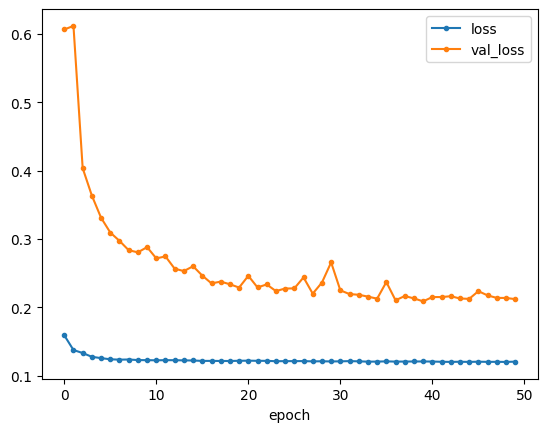

In [53]:
plot_history(history, ['loss', 'val_loss'])

In [56]:
threshold, val_score = model.optimize_thresholds(val_images, val_masks, measure=measure_precision(), axes='YX')

print("The higest score of {} is achieved with threshold = {}.".format(np.round(val_score, 3), threshold))

Computing best threshold: 


  0%|          | 0/19 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


  5%|▌         | 1/19 [01:09<20:42, 69.03s/it]

Score for threshold = 0.10 is 0.5929
1/1 [==============================] - 0s 51ms/step


 11%|█         | 2/19 [02:19<19:49, 69.99s/it]

Score for threshold = 0.15 is 0.6469
1/1 [==============================] - 0s 49ms/step


 16%|█▌        | 3/19 [03:29<18:38, 69.94s/it]

Score for threshold = 0.20 is 0.6751
1/1 [==============================] - 0s 50ms/step


 21%|██        | 4/19 [04:40<17:36, 70.42s/it]

Score for threshold = 0.25 is 0.6883
1/1 [==============================] - 0s 50ms/step


 26%|██▋       | 5/19 [05:50<16:24, 70.29s/it]

Score for threshold = 0.30 is 0.6968
1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 6/19 [07:01<15:17, 70.54s/it]

Score for threshold = 0.35 is 0.7016
1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 7/19 [08:12<14:07, 70.61s/it]

Score for threshold = 0.40 is 0.6990
1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 8/19 [09:22<12:55, 70.49s/it]

Score for threshold = 0.45 is 0.7001
1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 9/19 [10:34<11:49, 70.94s/it]

Score for threshold = 0.50 is 0.6948
1/1 [==============================] - 0s 50ms/step


 53%|█████▎    | 10/19 [11:45<10:37, 70.84s/it]

Score for threshold = 0.55 is 0.6870
1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 11/19 [12:57<09:30, 71.32s/it]

Score for threshold = 0.60 is 0.6757
1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 12/19 [14:09<08:19, 71.36s/it]

Score for threshold = 0.65 is 0.6534
1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 13/19 [15:20<07:08, 71.39s/it]

Score for threshold = 0.70 is 0.6298
1/1 [==============================] - 0s 50ms/step


 74%|███████▎  | 14/19 [16:32<05:57, 71.49s/it]

Score for threshold = 0.75 is 0.5862
1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 15/19 [17:43<04:45, 71.31s/it]

Score for threshold = 0.80 is 0.5351
1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 16/19 [18:56<03:35, 71.88s/it]

Score for threshold = 0.85 is 0.4709
1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 17/19 [20:07<02:23, 71.58s/it]

Score for threshold = 0.90 is 0.3270
1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 18/19 [21:20<01:12, 72.01s/it]

Score for threshold = 0.95 is 0.0537
1/1 [==============================] - 0s 51ms/step


100%|██████████| 19/19 [22:32<00:00, 71.17s/it]

Score for threshold = 1.00 is 0.0000
The higest score of 0.702 is achieved with threshold = 0.35.


In [57]:
test_data =  np.load('data/DSB2018_{}/test/test_data.npz'.format(noise_level), allow_pickle=True)
test_images = test_data['X_test']
test_masks = test_data['Y_test']

In [58]:
predicted_denoised, predicted_images, precision_result, _ = model.predict_denoised_label_masks(test_images,
                                                                                               test_masks,
                                                                                               axes='YX',
                                                                                               threshold=threshold,
                                                                                               measure=measure_precision())
print("Average precision over all test images with threshold = {} is {}.".format(0.5, np.round(precision_result, 3)))

1/1 [==============================] - 0s 115ms/step
Average precision over all test images with threshold = 0.5 is 0.651.


<Figure size 640x480 with 0 Axes>

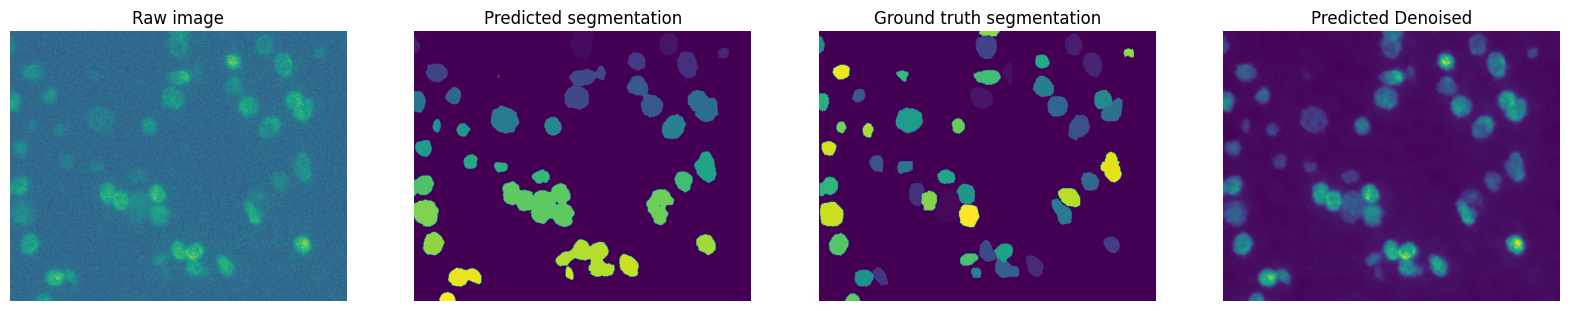

In [82]:
sl = -20
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.subplot(1, 4, 1)
plt.imshow(test_images[sl])
plt.title("Raw image")
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(predicted_images[sl])
plt.title("Predicted segmentation")
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(test_masks[sl])
plt.title("Ground truth segmentation")
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(predicted_denoised[sl])
plt.title("Predicted Denoised")
plt.axis('off')
plt.show()

<Figure size 640x480 with 0 Axes>

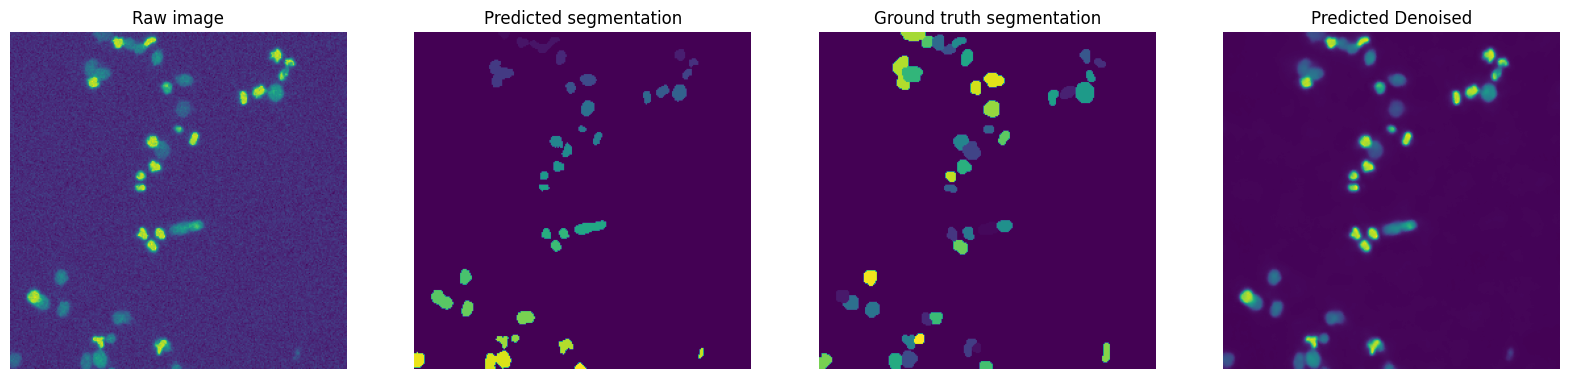

In [83]:
sl = 10
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.subplot(1, 4, 1)
plt.imshow(test_images[sl])
plt.title("Raw image")
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(predicted_images[sl])
plt.title("Predicted segmentation")
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(test_masks[sl])
plt.title("Ground truth segmentation")
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(predicted_denoised[sl])
plt.title("Predicted Denoised")
plt.axis('off')
plt.show()

<Figure size 640x480 with 0 Axes>

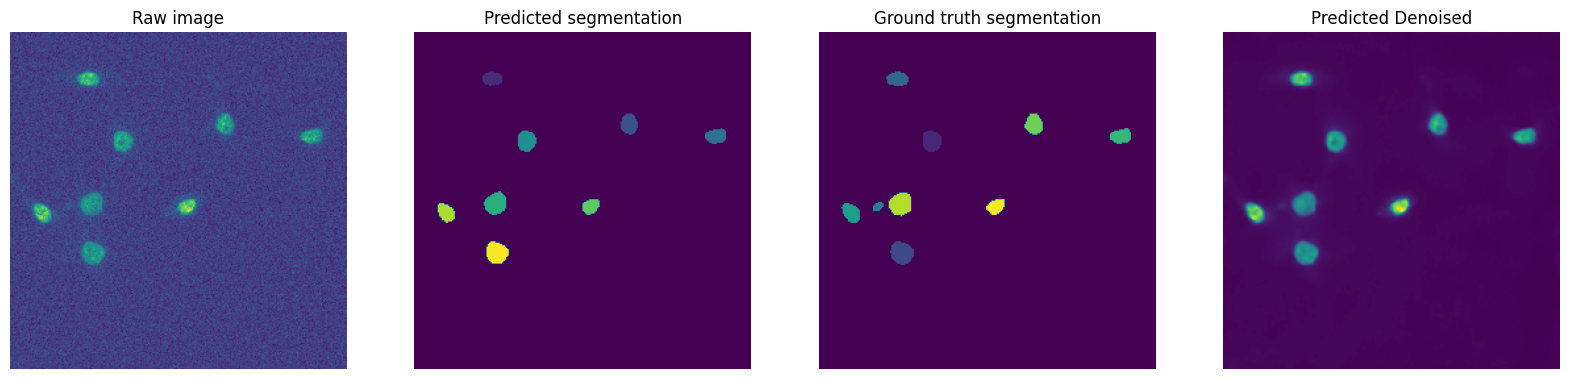

In [84]:
sl = 4
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.subplot(1, 4, 1)
plt.imshow(test_images[sl])
plt.title("Raw image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(predicted_images[sl])
plt.title("Predicted segmentation")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(test_masks[sl])
plt.title("Ground truth segmentation")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(predicted_denoised[sl])
plt.title("Predicted Denoised")
plt.axis('off')
plt.show()

<Figure size 640x480 with 0 Axes>

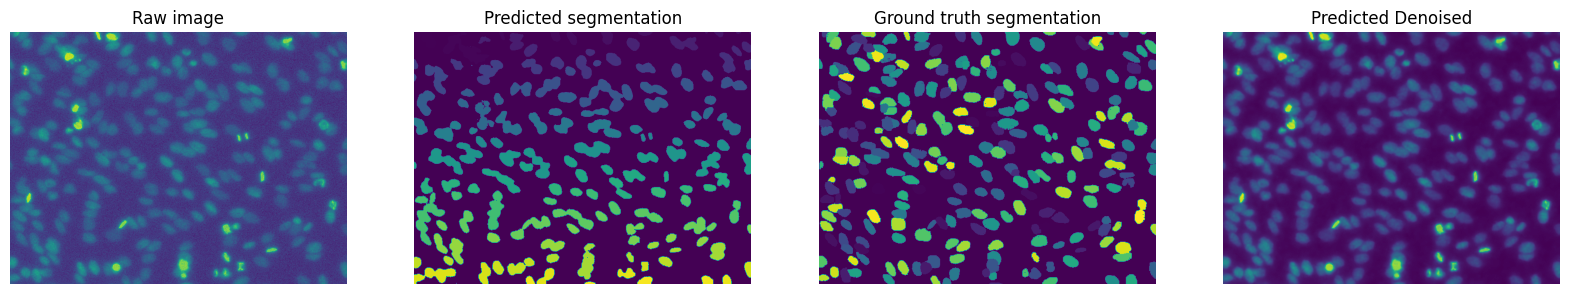

In [85]:
sl = 15
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.subplot(1, 4, 1)
plt.imshow(test_images[sl])
plt.title("Raw image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(predicted_images[sl])
plt.title("Predicted segmentation")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(test_masks[sl])
plt.title("Ground truth segmentation")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(predicted_denoised[sl])
plt.title("Predicted Denoised")
plt.axis('off')
plt.show()


In [63]:
print("Number of annotated images used for training:", number_of_annotated_training_images)
print("Noise level:", noise_level)
print("Considered alpha:", conf.denoiseg_alpha)

Number of annotated images used for training: 19
Noise level: n10
Considered alpha: 0.5
